In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
data = pd.read_excel("data.xlsx", sheet_name="Data")  
# a) Exploratory Data Analysis &  Data pre-processing
print(data.head())
print(data.info())
print(data.describe())

X = data.drop("MEMBERSHIP_STATUS", axis=1) 
y = data["MEMBERSHIP_STATUS"] 


  MEMBERSHIP_NUMBER  MEMBERSHIP_TERM_YEARS  ANNUAL_FEES MEMBER_MARITAL_STATUS  \
0            A00001                     29     113125.0                     M   
1            A00002                     38     112220.0                     M   
2            A00003                     12     100000.0                     M   
3            A00004                     12     100000.0                     M   
4            A00005                     46     100000.0                     M   

  MEMBER_GENDER  MEMBER_ANNUAL_INCOME  MEMBER_OCCUPATION_CD  \
0             M            25200000.0                   1.0   
1             M            10339200.0                   1.0   
2             M            14400000.0                   1.0   
3             M             9000000.0                   1.0   
4             M             4800000.0                   1.0   

  MEMBERSHIP_PACKAGE  MEMBER_AGE_AT_ISSUE  ADDITIONAL_MEMBERS PAYMENT_MODE  \
0             TYPE-B                   45               

In [4]:

# 	b) Split the data into training and test. Fit a model and score it with the test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_columns = ['MEMBERSHIP_TERM_YEARS', 'ANNUAL_FEES', 'MEMBER_ANNUAL_INCOME', 'MEMBER_AGE_AT_ISSUE', 'ADDITIONAL_MEMBERS']
categorical_columns = ['MEMBER_MARITAL_STATUS', 'MEMBER_GENDER', 'MEMBER_OCCUPATION_CD', 'MEMBERSHIP_PACKAGE', 'PAYMENT_MODE']
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.6912686927158708
Classification Report:
               precision    recall  f1-score   support

   CANCELLED       0.48      0.33      0.39       620
     INFORCE       0.75      0.85      0.79      1453

    accuracy                           0.69      2073
   macro avg       0.61      0.59      0.59      2073
weighted avg       0.67      0.69      0.67      2073



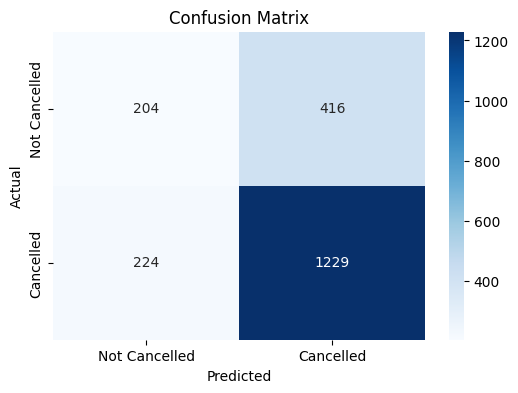

In [5]:
# C) Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_test, y_pred, ['Not Cancelled', 'Cancelled'])